In [19]:
require(data.table)
require(ggplot2)
require(reshape2)

data_dir="/oak/stanford/groups/smontgom/erobb/data/watershed"
pops = c("ESN", "GWD", "LWK", "MKK", "YRI", "MSL")
files = c("ESN.SVs.11.5.txt",
        "GWD.SVs.13.6.txt",
        "LWK.SVs.10.4.txt",
        "MKK.SVs.14.4.txt",
        "YRI.SVs.8.2.txt",
        "MSL.SVs.11.4.txt")


# We subsetted to autosomal
# lincRNA and protein-coding genes and restricted to genes with at least 6 reads and TPM > 0.1
# in at least 20% of individuals.

# TODO regress out "genotype of the strongest cis-eQTL for gene "

for (i in 1:length(pops)) {
    #COUNT = '/oak/stanford/groups/smontgom/mdegorte/durga/africa/fastqtl/normalizedCounts/deseq2ScaledGeneCounts.${pop}.bed.gz'
    pop = pops[i]
    f = files[i]
    print(pop)
    COUNT=sprintf('%s/deseq2ScaledGeneCounts.%s.bed',data_dir,pop)

    #COV_IN="/srv/scratch/mdegorte/africa/fastqtl/SVs/YRI/YRI.SVs.${numSV}.txt"
    COV_IN_genPC=sprintf("/oak/stanford/groups/smontgom/mdegorte/durga/africa/fastqtl/SVs/%s/%s",pop,f)


    expr_file = COUNT
    covs_file = COV_IN_genPC
    out_file = sprintf('%s/%s_exprResiduals.tsv', data_dir, pop)

    # TODO log2 scaling? there's negative values so I guess it's already scaled
    #expr = read.table(expr_file, header = T, sep = '\t')
    expr = read.delim(expr_file)
    row.names(expr) = expr[,"ID"] # set row name to gene ID

    # Read in covariates matrix
    covs = read.table(covs_file, header = T, sep = '\t', row.names = 1)

    id_keep = colnames(expr)[5:length(colnames(expr))]
    id_keep = intersect(id_keep,colnames(covs))

    covs = covs[,id_keep]
    expr = expr[,id_keep]
    # Scale to mean 0 variance 1 (over each gene)
    expr = scale(t(expr))

    # # For each gene in the expression file, perform a linear regression 
    # # Keep residuals
    resids = matrix(, ncol = ncol(expr), nrow = nrow(expr))
    rownames(resids) = rownames(expr)
    colnames(resids) = colnames(expr)

    for(i in 1:ncol(expr)){ # for each gene! seems slow but not too bad
        data = as.data.frame(cbind(expr[, i], t(covs)))
        colnames(data) = c('deseq2ScaledGeneCounts', rownames(covs))
        model = lm(deseq2ScaledGeneCounts ~ ., data = data)
        resids[, i] = model$residuals
    }
    # Center and scale, then transpose
    resids = t(scale(resids))

    # Write out the residuals
    write.table(matrix(c('Id', colnames(resids)), nrow = 1), out_file, quote = F, row.names = F, col.names = F, sep = '\t')
    write.table(resids, out_file, row.names = T, col.names = F, quote = F, sep = '\t', append = T)

}


Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Loading required package: reshape2

Warning message:
“package ‘reshape2’ was built under R version 4.2.3”
Error: package or namespace load failed for ‘reshape2’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/home/erobb/miniconda3/envs/sc/lib/R/library/stringi/libs/stringi.so':
  /home/erobb/miniconda3/envs/ws/lib/R/bin/exec/../../lib/../.././libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/erobb/miniconda3/envs/sc/lib/libicuuc.so.72)



[1] "ESN"
[1] "GWD"
[1] "LWK"
[1] "MKK"
[1] "YRI"
[1] "MSL"


In [20]:
library(ggplot2)

pops = c("ESN", "GWD", "LWK", "MKK", "YRI", "MSL")
pop="AFR"
r_file = sprintf('%s/%s_exprResiduals.tsv', data_dir, pop)

# Write out the residuals
resids = read.table(r_file, header=T, row.names=1)
resids = data.frame(t(resids))

In [21]:
resids

,ENSG00000227232.5,ENSG00000279457.4,ENSG00000230021.9,ENSG00000225972.1,ENSG00000225630.1,ENSG00000237973.1,ENSG00000229344.1,ENSG00000248527.1,ENSG00000198744.5,ENSG00000237491.8,⋯,ENSG00000067048.16,ENSG00000183878.15,ENSG00000215414.4,ENSG00000154620.5,ENSG00000241859.6,ENSG00000165246.13,ENSG00000176728.7,ENSG00000131002.11,ENSG00000012817.15,ENSG00000198692.9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HG03069,0.9293899,1.829409569,0.81195884,0.99935645,-0.59482835,-0.19533790,2.1933830,0.10985815,-0.20503193,-0.341283111,⋯,1.19487480,1.13393092,-0.841243581,1.26910330,1.4266692,1.0910739,0.65111712,1.13768630,1.145815490,1.228781677
HG03091,-1.2168890,-1.157161826,0.45918197,0.24478730,0.08998764,-0.46509473,-1.3544382,-0.14763528,-0.35895342,-0.973619501,⋯,-0.72170209,-0.72826233,-0.631704196,-0.73687486,-0.7196665,-0.8627707,-1.30356715,-0.74979137,-0.784966915,-0.783363365
HG03225,0.3772532,1.192543036,-0.24872511,0.42230555,0.40317372,-0.68276256,-1.1158839,-0.36775132,-0.41362899,0.237689905,⋯,0.99755230,0.94890615,2.969931186,0.91080123,1.0025635,1.0790597,0.88953993,0.84918964,0.888313939,0.995550403
HG03449,-0.4054794,-0.718933997,1.03328976,0.99435219,-0.83675933,-0.09711683,-0.5146393,0.38737449,0.40642881,0.059286073,⋯,-0.76346428,-0.86275580,0.009426025,-0.75122481,-0.6372405,-0.7917478,-0.43735538,-0.82467229,-0.856865524,-0.865699446
HG03472,1.1968947,2.596932432,-0.07237402,0.58344272,0.41270398,0.31615377,0.9482910,0.99757816,-0.06877164,-0.784554326,⋯,1.39207900,1.44251887,-0.557390510,1.13193678,1.2868861,1.4117095,1.31251177,1.13356438,1.270413163,1.245516009
HG03548,0.9018888,1.401353187,0.79593480,1.49676602,-1.15806857,-0.13395689,-0.2617614,-0.36034845,-0.41855747,0.059003006,⋯,-0.75782009,-0.81286309,0.549490442,-1.29195018,-0.8996826,-0.6494699,0.19880221,-0.75206817,-0.718589348,-0.807417076
HG03578,-0.7544393,-0.517380628,0.40832387,0.73208090,-0.16655464,0.19755717,-0.3785618,0.01329390,-0.40511329,0.991550497,⋯,-0.87844760,-0.86355708,-0.451155430,-1.03831585,-1.1975107,-1.1026103,2.61147095,-1.05982480,-1.021603640,-0.894973444
HG03072,-0.5126461,1.284961034,0.49530526,0.48153246,0.68862115,-0.45369543,0.7995662,-0.04615705,-0.75724652,1.818674355,⋯,1.28988626,1.23683212,-1.050211564,1.12926132,0.9658983,1.3789074,-0.36337638,1.24657865,1.173252041,1.292155207
HG03095,-0.6732036,-0.148325578,-1.38052858,-1.88244395,0.63574547,0.38366511,0.7530493,0.42573496,-0.07502421,0.501852294,⋯,-0.43128893,-0.43484348,0.488381962,-0.49314656,-0.4597364,-0.4453167,-0.59360162,-0.42093171,-0.480868195,-0.482527949


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


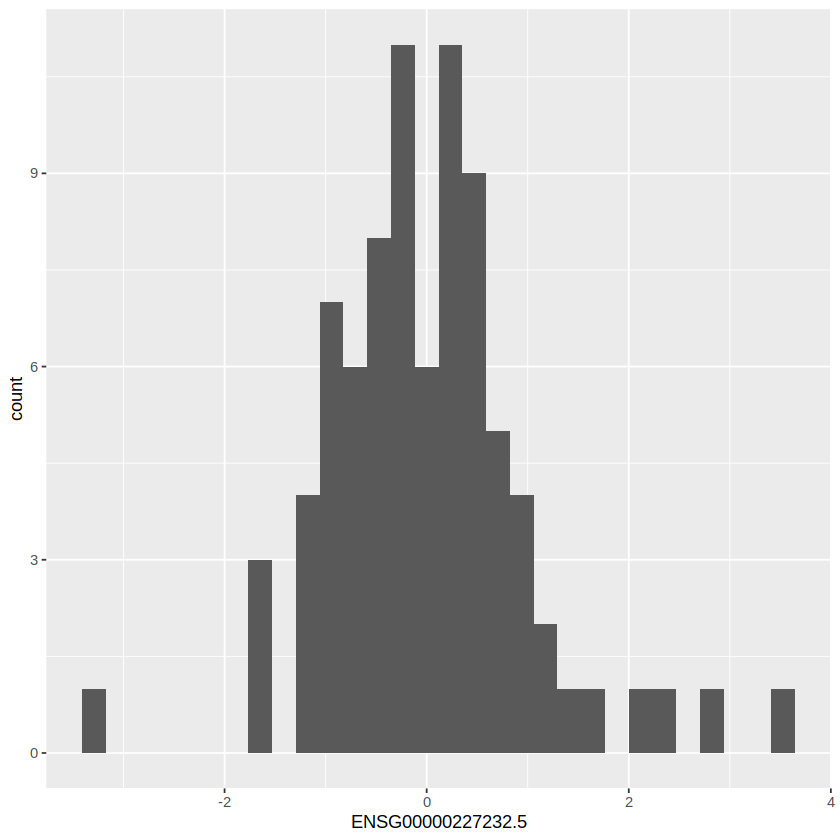

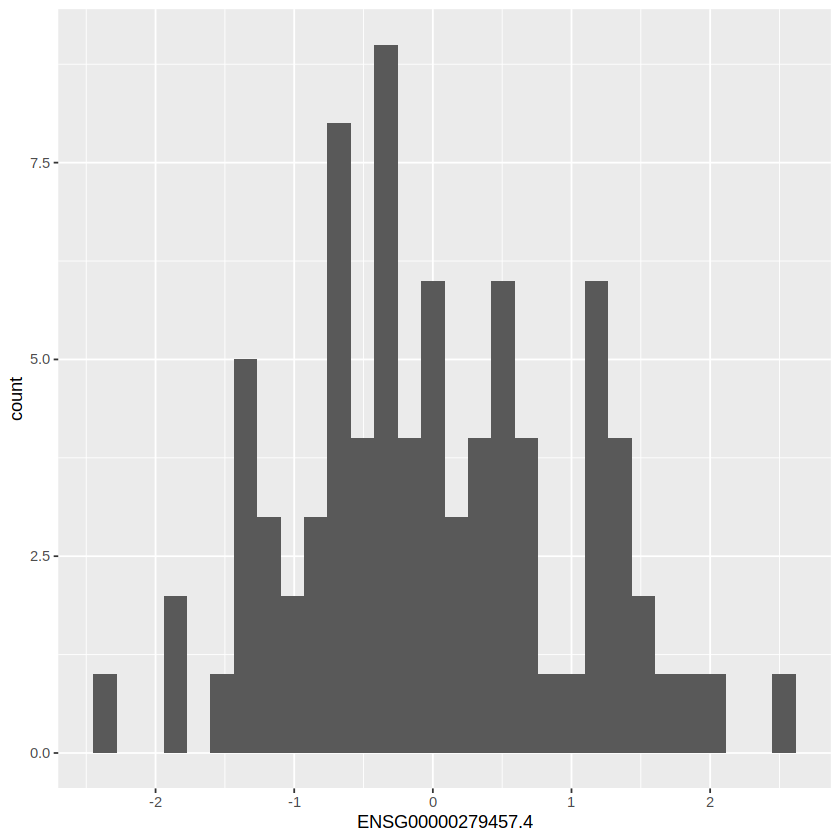

In [22]:
ggplot(resids, aes(x=ENSG00000227232.5)) +  geom_histogram()
ggplot(resids, aes(x=ENSG00000279457.4)) +  geom_histogram()

### Label outliers

In [150]:
## Pick outliers using median Z-score >= 2
## Remove individuals with >= 50 outliers 
## Write to file
## Also write out list of individuals that pass outlier count threshold
## Also write out the most extreme individual per gene without threshold (after removing individuals with >= 50 outliers)
z_thresh = 3
# AFGR individuals have more on average, so we can choose a higher threshold than Watershed
z_ind_filt = 75

pops = c("ESN", "GWD", "LWK", "MKK", "YRI", "MSL")
for (pop in pops) {
    r_file = sprintf('%s/%s_exprResiduals.tsv', data_dir, pop)

    # Write out the residuals
    resids = read.table(r_file, header=T, row.names=1)
    resids = data.frame(t(resids))
    
    w = abs(resids) > z_thresh
    w = data.frame(sapply(data.frame(w), function(x) as.integer(x)))
    rownames(w) = rownames(resids)
    indiv_noutliers = data.frame(rowSums(w))
    indiv_keep = rownames(indiv_noutliers)[which(indiv_noutliers < z_ind_filt)]

    mean(indiv_noutliers[,])
    sqrt(var(indiv_noutliers[,]))
    median(indiv_noutliers[,])
    print(sprintf("Keeping %i / %i individuals with z_thresh = %i, max outliers = %i",length(indiv_keep), length(rownames(w)), z_thresh, z_ind_filt))
    write.table(indiv_keep, sprintf('%s/ids_outlier_filtered_%s_t%if%i.txt', data_dir, pop, z_thresh, z_ind_filt), quote = F, sep = '\t', col.names = F, row.names = F)
    write.table(w, sprintf('%s/eOutlier_scores_%s_t%i.txt', data_dir, pop, z_thresh))
}


[1] "Keeping 62 / 97 individuals with z_thresh = 3, max outliers = 75"
[1] "Keeping 72 / 112 individuals with z_thresh = 3, max outliers = 75"
[1] "Keeping 60 / 96 individuals with z_thresh = 3, max outliers = 75"
[1] "Keeping 102 / 164 individuals with z_thresh = 3, max outliers = 75"
[1] "Keeping 32 / 41 individuals with z_thresh = 3, max outliers = 75"
[1] "Keeping 52 / 83 individuals with z_thresh = 3, max outliers = 75"


In [164]:
# Create a combined file for AFR
pops = c("ESN", "GWD", "LWK", "MKK", "YRI", "MSL")
afr_id_filt = data.frame()
afr_eout_scores = data.frame()
for (pop in pops) {
    afr_id_filt = rbind(afr_id_filt,
          read.table(sprintf('%s/ids_outlier_filtered_%s_t%if%i.txt', data_dir, pop, z_thresh, z_ind_filt), sep=" "))
    afr_eout_scores = rbind(afr_eout_scores,
          read.table(sprintf('%s/eOutlier_scores_%s_t%i.txt', data_dir, pop, z_thresh), sep=" "))
}
write.table(afr_id_filt, sprintf('%s/ids_outlier_filtered_AFR_t%if%i.txt', data_dir, z_thresh, z_ind_filt), quote = F, sep = '\t', col.names = F, row.names = F)
write.table(afr_eout_scores, sprintf('%s/eOutlier_scores_AFR_t%i.txt', data_dir, z_thresh))


In [166]:
 read.table(sprintf('%s/ids_outlier_filtered_%s_t%if%i.txt', data_dir, 'AFR', z_thresh, z_ind_filt), sep=" ")

V1
<chr>
HG02941
HG02976
HG03114
HG03135
HG03189
HG03271
HG02943
HG02977
HG03115


In [165]:
read.table(sprintf('%s/eOutlier_scores_%s_t%i.txt', data_dir, 'AFR', z_thresh), sep=" ")

,ENSG00000227232.5,ENSG00000279457.4,ENSG00000230021.9,ENSG00000225972.1,ENSG00000225630.1,ENSG00000237973.1,ENSG00000229344.1,ENSG00000248527.1,ENSG00000198744.5,ENSG00000237491.8,⋯,ENSG00000067048.16,ENSG00000183878.15,ENSG00000215414.4,ENSG00000154620.5,ENSG00000241859.6,ENSG00000165246.13,ENSG00000176728.7,ENSG00000131002.11,ENSG00000012817.15,ENSG00000198692.9
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
HG02941,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HG02976,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HG03114,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
HG03135,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HG03189,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HG03271,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HG03313,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HG03367,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HG02943,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
